# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from ppo import run_ppo

run_ppo(env)

update 1/100. Last update in 2.6226043701171875e-06s
last 100 returns: -0.0009999998286366462
update 2/100. Last update in 9.819352149963379s
last 100 returns: -0.004999999888241291
update 3/100. Last update in 9.472856044769287s
last 100 returns: -0.004999999888241291
update 4/100. Last update in 10.090598106384277s
last 100 returns: -0.004999999888241291
update 5/100. Last update in 10.26661205291748s
last 100 returns: -0.004999999888241291
update 6/100. Last update in 9.915928840637207s
last 100 returns: -0.004999999888241291
update 7/100. Last update in 10.074723243713379s
last 100 returns: -0.004999999888241291
update 8/100. Last update in 10.07712697982788s
last 100 returns: -0.004999999888241291
update 9/100. Last update in 10.244347095489502s
last 100 returns: -0.004999999888241291
update 10/100. Last update in 9.936025857925415s
last 100 returns: -0.004999999888241291
update 11/100. Last update in 9.947484016418457s
last 100 returns: -0.004999999888241291
update 12/100. Last u

last 100 returns: 0.015000000409781934
update 95/100. Last update in 9.791560888290405s
last 100 returns: 0.022000000532716512
update 96/100. Last update in 9.80411696434021s
last 100 returns: 0.010000000335276127
update 97/100. Last update in 9.75969386100769s
last 100 returns: 0.009000000320374965
update 98/100. Last update in 9.845091819763184s
last 100 returns: 0.012000000365078449
update 99/100. Last update in 9.82431411743164s
last 100 returns: 0.018000000454485417
update 100/100. Last update in 9.797363996505737s
last 100 returns: 0.011000000350177288


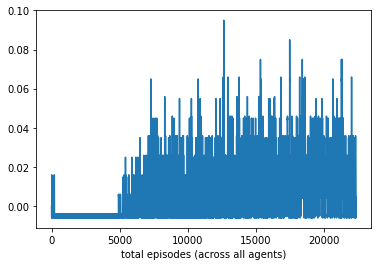

In [6]:
def copy_model_and_plot_learning_curve():
    import pickle
    import matplotlib.pyplot as plt
    from collections import deque
    import os
    import datetime
    import shutil
    
    datetime_stamp = datetime.datetime.now().strftime('%y%m%d_%H%M')
    plot_path = f'checkpoints/{datetime_stamp}'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    else:
        print(f'directory {plot_path} already exists')
        return
    
    shutil.copyfile(f'{brain_name}_scores.pickle', f'{plot_path}/scores.pickle')
    shutil.copyfile(f'{brain_name}_model_checkpoint.pickle', f'{plot_path}/model.pickle')

    with open(f'{plot_path}/scores.pickle', 'rb') as f:
        total_rewards = pickle.load(f)

    smoothed = []
    queue = deque([], maxlen=10)
    for r in total_rewards:
        queue.append(r)
        smoothed.append(sum(queue)/len(queue))
    fig,ax = plt.subplots()
    ax.plot(smoothed)
    ax.set_xlabel('total episodes (across all agents)')
    plt.savefig(f'{plot_path}/learning_curve.png')
    plt.show()
copy_model_and_plot_learning_curve()